In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from glob import glob

In [2]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')

In [3]:
path =female+ male

In [4]:
path

['./data/crop/female_crop\\female_0.png',
 './data/crop/female_crop\\female_1.png',
 './data/crop/female_crop\\female_100.png',
 './data/crop/female_crop\\female_1003.png',
 './data/crop/female_crop\\female_1008.png',
 './data/crop/female_crop\\female_1009.png',
 './data/crop/female_crop\\female_1012.png',
 './data/crop/female_crop\\female_1014.png',
 './data/crop/female_crop\\female_1017.png',
 './data/crop/female_crop\\female_102.png',
 './data/crop/female_crop\\female_1021.png',
 './data/crop/female_crop\\female_1022.png',
 './data/crop/female_crop\\female_1024.png',
 './data/crop/female_crop\\female_1025.png',
 './data/crop/female_crop\\female_1026.png',
 './data/crop/female_crop\\female_1027.png',
 './data/crop/female_crop\\female_1029.png',
 './data/crop/female_crop\\female_1030.png',
 './data/crop/female_crop\\female_1032.png',
 './data/crop/female_crop\\female_1033.png',
 './data/crop/female_crop\\female_1034.png',
 './data/crop/female_crop\\female_1035.png',
 './data/crop/fema

In [5]:
#getting size of images
img = Image.open(path[0])
img.size

(273, 273)

In [6]:
# let take in a function 
def getSize(path):
    img= Image.open(path)
    return img.size[0]
    

In [7]:
getSize(path[0])

273

In [8]:
# lets create a dataFram by using pandas
df= pd.DataFrame(data=path,columns=['path'])
df.shape

(6058, 1)

In [9]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,273
2,./data/crop/female_crop\female_100.png,182
3,./data/crop/female_crop\female_1003.png,182
4,./data/crop/female_crop\female_1008.png,81


In [10]:
df.tail()

,path,size
6053,./data/crop/male_crop\male_989.png,182
6054,./data/crop/male_crop\male_99.png,273
6055,./data/crop/male_crop\male_991.png,122
6056,./data/crop/male_crop\male_995.png,182
6057,./data/crop/male_crop\male_999.png,273


# Exploratory Data Analysis EDA

In [11]:
df.describe()

,size
count,6058.000000
mean,154.398977
std,71.727723
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


In [13]:
df['size'].plot('box')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.

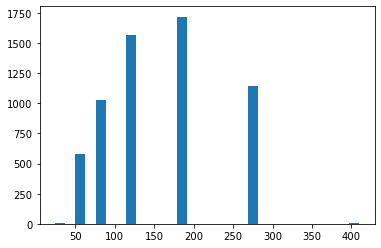

In [14]:
plt.hist(df['size'],bins=30)
plt.show()

# So, from analysis i will resize all the image in 100 x 100 form and remove image with size less or equal 54

In [15]:
len(df['size']>60)

6058

In [16]:
#condition convert boolean form
df_new = df[df['size']>60]

In [17]:
df_new

,path,size
0,./data/crop/female_crop\female_0.png,273
1,./data/crop/female_crop\female_1.png,273
2,./data/crop/female_crop\female_100.png,182
3,./data/crop/female_crop\female_1003.png,182
4,./data/crop/female_crop\female_1008.png,81
...,...,...
6053,./data/crop/male_crop\male_989.png,182
6054,./data/crop/male_crop\male_99.png,273
6055,./data/crop/male_crop\male_991.png,122
6056,./data/crop/male_crop\male_995.png,182


In [18]:
#delte 243
#in df_new =3257
string = df_new['path'][0]
string.split('_')[0].split('/')[-1]


'female'

In [19]:
string = df_new['path'][0]
def gender(string):
    try:

        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [20]:
df['gender'] = df['path'].apply(gender)

female    0.592605
male      0.407395
Name: gender, dtype: float64


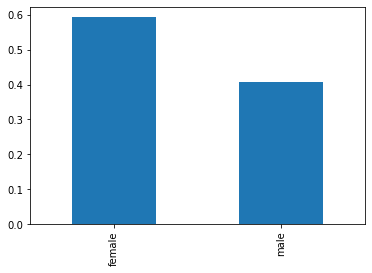

In [21]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

# 1-  60 % Female are there and rest 40% are male
# 2- All the images size is greater than or equal to 81
# conclusion : resizing all the image in df_new to 100 x 100 array

# Resize Image

In [22]:
#for resize an image we should this four steps
def resize_img(path_to_resize):
    try:
        
        # steps 1: read image
        img = cv2.imread(path_to_resize)
        
        #steps 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
        
        #steps 3- resize into 100 * 100 array
        size = gray.shape[0]
    
        if size >= 100: #shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # SHRINK
        else: # enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # ENLARGE
        # step -4: Flatten Image (1x10,000)
        return gray_re.flatten()
    except:
        return None;

In [23]:
len(resize_img(path[0]))

10000

In [26]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

C:\Users\Noora\AppData\Local\Temp/ipykernel_9528/4180963935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,./data/crop/female_crop\female_0.png,273,female
1,./data/crop/female_crop\female_1.png,273,female
2,./data/crop/female_crop\female_100.png,182,female
3,./data/crop/female_crop\female_1003.png,182,female
4,./data/crop/female_crop\female_1008.png,81,female


In [29]:
#structuring function 
df_new['structure_data'] = df_new['path'].apply(resize_img)

C:\Users\Noora\AppData\Local\Temp/ipykernel_9528/2652438292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [30]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)

In [31]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [32]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


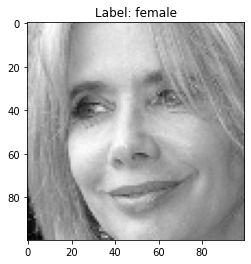

In [33]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [34]:
import pickle

In [35]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))

In [37]:
df.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30
